In [ ]:
NOT USED
import bz2 
import tarfile
import json
import os.path
import sys
import pandas as pd
import numpy as np
from nltk import tokenize

#filepath='/home/augustine/Documents/reddit_project/RC_2017-05.bz2' #name the file
#zipfile = bz2.BZ2File(filepath) # open the file
#data = zipfile.read() # get the decompressed data
#dicts= json.loads(data)

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
bz_file = bz2.BZ2File(archive, 'rb', 1000000)
#r/IAmA
#r/Technology
commentCount= []
while true:
    line = bz_file.readline().decode('utf8')
    if len(line)==0 :
        break
    comment=json.loads(line)
    id= comment['id']
    body= comment['body']
    
    comentLines= tokenize.sent_tokenize(body)
    for line in commentLines:
        line = line.replace('\n', ' ').replace('\r', '')
        print(line)
        
    commentCount += 1
    
    if commentCount % 1000 == 0:
        print(commentCount)
    
bz_file.close()


#newfilepath = filepath[:-4] # assuming the filepath ends with .bz2
#open(newfilepath, 'wb').write(data) # write a uncompressed file

#tar= tarfile.open(filename,'r')

#txt=bz2File.

#df= pd.read_csv('/home/augustine/Documents/reddit_project/RC_2017-05.bz2',compression='bz2',header=0,sep=',')

In [4]:
import bz2 
import json

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    for comment in f:
        print(comment)
        parse_comment= json.loads(comment)
        print(parse_comment)
        print(parse_comment['subreddit'],parse_comment['body'])
        break

{"author":"varvar1n","author_flair_css_class":null,"author_flair_text":null,"body":"Ich muss leider feststellen, dass das einzige, was wirklich zur DE Leitkultur geh\u00f6rt, die Peinlichkeit Stakkato von jedem Innenminister ist. Da macht der Tommy auch brav mit. Und ich schreibe seit 2015 wie immer wenn ich \u00fcber Tommy schreibe den Hashtag #immernochinamt Es ist ein Wunder, wie er so viele Pannen \u00fcberstanden hat und den Absurd weiter und h\u00f6her getrieben hat. ","can_gild":true,"controversiality":0,"created_utc":1493596800,"distinguished":null,"edited":false,"gilded":0,"id":"dgyrubd","link_id":"t3_68gcih","parent_id":"t3_68gcih","retrieved_on":1494514468,"score":4,"stickied":false,"subreddit":"de","subreddit_id":"t5_22i0"}

{'author': 'varvar1n', 'author_flair_css_class': None, 'author_flair_text': None, 'body': 'Ich muss leider feststellen, dass das einzige, was wirklich zur DE Leitkultur gehört, die Peinlichkeit Stakkato von jedem Innenminister ist. Da macht der Tommy au

In [100]:
#parse_comment.keys()
parse_comment['subreddit']



'de'

In [6]:
#total records in 5/2017 comment file
archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    for count, record in enumerate(f):
        pass
    print(count)

79810359


In [8]:
import collections 

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    counter= collections.Counter(json.loads(comment)['subreddit'] for comment in f)


counter




Counter({'de': 132208,
         'AskReddit': 5477134,
         'xxfitness': 30130,
         'politics': 2030218,
         'aww': 226784,
         'movies': 397599,
         'gaming': 464367,
         'kulchasimulator': 7239,
         'The_Donald': 1222203,
         'hardwareswap': 62808,
         'CCW': 19810,
         'autism': 3479,
         'soccer': 572163,
         'starbucks': 19523,
         'funhaus': 13721,
         'DnD': 114850,
         'hockey': 636822,
         'Cartalk': 5205,
         'AskMen': 134975,
         'hentai': 3783,
         'relationships': 304513,
         'SquaredCircle': 524949,
         'starcraft': 28522,
         'MMA': 252268,
         'StardustCrusaders': 17944,
         'smashbros': 62463,
         'allthingszerg': 1343,
         'cringepics': 34016,
         'trees': 147136,
         'orlando': 5572,
         'ApplyingToCollege': 17820,
         'PoliticalHumor': 70862,
         'AFL': 75575,
         'Warthunder': 52977,
         'TrueReddit': 187

In [14]:
#take a look at one record
archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    for comment in f:
        if json.loads(comment)['subreddit']=='technology':
            line= json.loads(comment)
            print(line)
            break
            #comment= json.loads(comment)['body']  
    #for text in comment:
        #print(text)
        #break
 #       print(comment)
 #       break
 #       body= comment['body']
 #       my_id= comment['id']
 #       created_utc= comment['created_utc']
 #       parent_id=comment['parent_id']
 #       score= comment['score']
        
    
#    for text in myTech:
#        print(text)
    


{'author': 'TittieMilkTittieMilk', 'author_flair_css_class': None, 'author_flair_text': None, 'body': "Wait, you can get HBO for just a couple months? You don't have to sign a contract for a year? We switched from HBO to Starz and now I'm beyond regretful... I just want it for a few months to watch Game of Thrones.", 'can_gild': True, 'controversiality': 0, 'created_utc': 1493596827, 'distinguished': None, 'edited': False, 'gilded': 0, 'id': 'dgyrv10', 'link_id': 't3_68g6e7', 'parent_id': 't1_dgym9lv', 'retrieved_on': 1494514478, 'score': 11, 'stickied': False, 'subreddit': 'technology', 'subreddit_id': 't5_2qh16'}


In [36]:
import pandas as pd

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
commentCount= 0

author=[]
author_flair_css_class= []
author_flair_text= []
body= []
can_gild= []
controversiality= []
created_utc= []
distinguished= []
edited= []
gilded= []
id= []
link_id= []
parent_id= []
retrieved_on= []
score= []
stickied= []
subreddit= []
subreddit_id= []

line_all= []
with bz2.open(archive,'rt') as f:
    for comment in f:
        if json.loads(comment)['subreddit']=='technology':
            line= json.loads(comment)
            line_all += line.values()

        commentCount += 1
        if commentCount % 1000000 == 0:
            print(commentCount)

#author=[]
#author_flair_css_class= []
#author_flair_text= []
#body= []
#can_gild= []
#controversiality= []
#created_utc= []
#distinguished= []
#edited= []
#gilded= []
#id= []
#link_id= []
#parent_id= []
#retrieved_on= []
#score= []
#stickied= []
#subreddit= []
#subreddit_id= []
    
#for i in range(0, commentCount):
    
            #print(line)
            
            #train= pd.DataFrame.from_dict(line,orient='index')
            #train.reset_index(level=0,inplace=True)
            
            
            


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [78]:
import pandas as pd

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
commentCount= 0

author=[]
author_flair_css_class= []
author_flair_text= []
body= []
can_gild= []
controversiality= []
created_utc= []
distinguished= []
edited= []
gilded= []
id= []
link_id= []
parent_id= []
retrieved_on= []
score= []
stickied= []
subreddit= []
subreddit_id= []

line_all= []
with bz2.open(archive,'rt') as f:
    comment= [json.loads(comment) for comment in f if json.loads(comment)['subreddit']=='technology']
    #for comment in f:
        #if json.loads(comment)['subreddit']=='technology':
        #line= json.loads(comment)
    #line_all += comment.values()
    line_all= line_all.append(comment)
    
    commentCount += 1
    if commentCount % 1000000 == 0:
        print(commentCount)


In [4]:
#step 1
##pd.set_option('display.max_columns',None)#b/c i want to see all columns
import pandas as pd
import json
import bz2 

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'

line_all= []
with bz2.open(archive,'rt') as f:
    my_row= []
    for comment in f:
        if json.loads(comment)['subreddit']=='technology':
            comment= json.loads(comment) 
            my_row.append(comment)
    line_all.append(my_row)
    #for comment in f:
        #if json.loads(comment)['subreddit']=='technology':
        #line= json.loads(comment)
    #line_all += comment.values()
    #line_all= line_all.append(comment)


In [1]:
line_all[0][1]['author']

NameError: name 'line_all' is not defined

In [5]:
#step 2
author=[]
author_flair_css_class= []
author_flair_text= []
body= []
can_gild= []
controversiality= []
created_utc= []
distinguished= []
edited= []
gilded= []
id= []
link_id= []
parent_id= []
retrieved_on= []
score= []
stickied= []
subreddit= []
subreddit_id= []


for i in range(0, len(line_all[0])):
    author.append(line_all[0][i]['author'])
    author_flair_css_class.append(line_all[0][i]['author_flair_css_class'])
    author_flair_text.append(line_all[0][i]['author_flair_text'])
    body.append(line_all[0][i]['body'])
    can_gild.append(line_all[0][i]['can_gild'])
    controversiality.append(line_all[0][i]['controversiality'])
    created_utc.append(line_all[0][i]['created_utc'])
    distinguished.append(line_all[0][i]['distinguished'])
    edited.append(line_all[0][i]['edited'])
    gilded.append(line_all[0][i]['gilded'])
    id.append(line_all[0][i]['id'])
    link_id.append(line_all[0][i]['link_id'])
    parent_id.append(line_all[0][i]['parent_id'])
    retrieved_on.append(line_all[0][i]['retrieved_on'])
    score.append(line_all[0][i]['score'])
    stickied.append(line_all[0][i]['stickied'])
    subreddit.append(line_all[0][i]['subreddit'])
    subreddit_id.append(line_all[0][i]['subreddit_id'])

    

In [6]:
#step 3 check the length matches earlier
#line_all[1][]['line']['body']
len(line_all[0])

139136

In [7]:
#step 4
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

tech_df= DataFrame({'author':author,
                   'author_flair_css_class':author_flair_css_class,
                   'author_flair_text':author_flair_text,
                   'body':body,
                   'can_gild':can_gild,
                   'controversiality':controversiality,
                   'created_utc':created_utc,
                   'distinguished':distinguished,
                   'edited':edited,
                   'gilded':gilded,
                   'id':id,
                   'link_id':link_id,
                   'parent_id':parent_id,
                   'retrieved_on':retrieved_on,
                   'score':score,
                   'stickied':stickied,
                   'subreddit':subreddit,
                   'subreddit_id':subreddit_id})

tech_df= tech_df[['author', 'author_flair_css_class','author_flair_text','body','can_gild','controversiality',
                   'created_utc','distinguished','edited','gilded','id','link_id','parent_id','retrieved_on',
                   'score','stickied','subreddit','subreddit_id']]

In [8]:
#take a look at the df
tech_df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,retrieved_on,score,stickied,subreddit,subreddit_id
0,TittieMilkTittieMilk,None,None,"Wait, you can get HBO for just a couple months...",True,0,1493596827,None,False,0,dgyrv10,t3_68g6e7,t1_dgym9lv,1494514478,11,False,technology,t5_2qh16
1,Natanael_L,None,None,And that's still a social problem. How to solv...,True,0,1493596880,None,False,0,dgyrwci,t3_68dw34,t1_dgymgut,1494514495,2,False,technology,t5_2qh16
2,Esc_ape_artist,None,None,Get rid of net neutrality and they move the fe...,True,0,1493596886,None,False,0,dgyrwgp,t3_68g6e7,t1_dgyija1,1494514497,20,False,technology,t5_2qh16
3,Aquareon,None,None,Objects do not typically recognize their surro...,True,0,1493596938,None,False,0,dgyrxsr,t3_68eud9,t1_dgxy7l3,1494514515,0,False,technology,t5_2qh16
4,LeakySkylight,None,None,"Google makes around $1.50 per handset, and onl...",True,0,1493596942,None,False,0,dgyrxwv,t3_68eksh,t1_dgyh9nm,1494514516,1,False,technology,t5_2qh16


In [9]:
#step 6
#change the epoch time to python datetime
tech_df['created_utc']= pd.to_datetime((tech_df['created_utc'].values*1e9).astype(int))

In [10]:
#step 7
#inspect new datetime format
tech_df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,retrieved_on,score,stickied,subreddit,subreddit_id
0,TittieMilkTittieMilk,None,None,"Wait, you can get HBO for just a couple months...",True,0,2017-05-01 00:00:27,None,False,0,dgyrv10,t3_68g6e7,t1_dgym9lv,1494514478,11,False,technology,t5_2qh16
1,Natanael_L,None,None,And that's still a social problem. How to solv...,True,0,2017-05-01 00:01:20,None,False,0,dgyrwci,t3_68dw34,t1_dgymgut,1494514495,2,False,technology,t5_2qh16
2,Esc_ape_artist,None,None,Get rid of net neutrality and they move the fe...,True,0,2017-05-01 00:01:26,None,False,0,dgyrwgp,t3_68g6e7,t1_dgyija1,1494514497,20,False,technology,t5_2qh16
3,Aquareon,None,None,Objects do not typically recognize their surro...,True,0,2017-05-01 00:02:18,None,False,0,dgyrxsr,t3_68eud9,t1_dgxy7l3,1494514515,0,False,technology,t5_2qh16
4,LeakySkylight,None,None,"Google makes around $1.50 per handset, and onl...",True,0,2017-05-01 00:02:22,None,False,0,dgyrxwv,t3_68eksh,t1_dgyh9nm,1494514516,1,False,technology,t5_2qh16


In [90]:
tech_df['author'].notnull().sum()

139136

In [147]:
tech_df['author_flair_css_class'].notnull().sum()

#tech_df['author_flair_css_class'].value_counts()


0

In [148]:
tech_df['author_flair_text'].notnull().sum()
#tech_df['author_flair_text'].value_counts()

0

In [143]:
tech_df['controversiality'].value_counts()

0    133974
1      5162
Name: controversiality, dtype: int64

In [152]:
tech_df['controversiality'].value_counts()/tech_df['controversiality'].notnull().sum()

0    0.9629
1    0.0371
Name: controversiality, dtype: float64

In [151]:
tech_df['parent_id'].value_counts()

t3_6cvg82     942
t3_68t1xl     803
t3_6bytpx     670
t3_6904d5     665
t3_6e8wta     562
t3_6e1gb5     441
t3_69y4as     427
t3_6d210m     419
t3_68is68     408
t3_6c27c1     406
t3_6adipo     396
t3_6axnqn     388
t1_dh13wun    331
t3_6ajiyk     331
t3_6ca0a3     318
t3_6dinyc     318
t3_6da6qa     317
t3_68lvt7     301
t3_6bvwmt     300
t3_6clugj     274
t3_6aqft4     273
t3_6dtiyo     269
t3_69dnox     266
t1_dhiiw9h    220
t3_6cegob     215
t3_69kkfl     210
t3_6e6chk     209
t3_6eemnd     208
t3_68g6e7     200
t3_6a632m     198
             ... 
t1_dhckctr      1
t3_69qqhj       1
t1_di9y66e      1
t1_dh7tjnb      1
t1_dhtv7iu      1
t1_dhag3vn      1
t1_dhky0it      1
t1_dhzzok4      1
t1_dgxe9ti      1
t1_dh4xn2s      1
t1_dh5wfd6      1
t1_dh753y1      1
t1_dhqwh9y      1
t1_di6os5p      1
t1_dh77n48      1
t1_dhy98fb      1
t1_di1gn2d      1
t1_dh19ec2      1
t1_dhl1qj2      1
t1_di7uff4      1
t3_6aynq5       1
t1_dh06j3i      1
t3_6biqh4       1
t1_dhjmk1p      1
t1_di8f68h

In [149]:
tech_df['parent_id'].value_counts().unique()

array([942, 803, 670, 665, 562, 441, 427, 419, 408, 406, 396, 388, 331,
       318, 317, 301, 300, 274, 273, 269, 266, 220, 215, 210, 209, 208,
       200, 198, 184, 183, 179, 156, 141, 138, 137, 135, 124, 123, 122,
       121, 116, 115, 111, 110, 108, 103,  96,  95,  93,  92,  90,  82,
        81,  80,  79,  76,  74,  70,  69,  68,  67,  66,  64,  63,  61,
        60,  59,  58,  57,  56,  55,  54,  52,  51,  50,  49,  48,  47,
        46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,
        33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,
        20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,
         7,   6,   5,   4,   3,   2,   1])

In [91]:
tech_df['author'].describe()

count        139136
unique        42954
top       [deleted]
freq          12335
Name: author, dtype: object

In [145]:
tech_df['score'].describe()

count    139136.000000
mean         13.491002
std         157.374187
min        -501.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       23369.000000
Name: score, dtype: float64

In [57]:
tech_df['body'].describe()

count        139136
unique       121956
top       [removed]
freq           5923
Name: body, dtype: object

In [11]:
#create an 'hour' feature so we can graph posts by hour of day
tech_df['hour']=tech_df.created_utc.dt.hour

In [13]:
tech_df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,retrieved_on,score,stickied,subreddit,subreddit_id,hour
0,TittieMilkTittieMilk,None,None,"Wait, you can get HBO for just a couple months...",True,0,2017-05-01 00:00:27,None,False,0,dgyrv10,t3_68g6e7,t1_dgym9lv,1494514478,11,False,technology,t5_2qh16,0
1,Natanael_L,None,None,And that's still a social problem. How to solv...,True,0,2017-05-01 00:01:20,None,False,0,dgyrwci,t3_68dw34,t1_dgymgut,1494514495,2,False,technology,t5_2qh16,0
2,Esc_ape_artist,None,None,Get rid of net neutrality and they move the fe...,True,0,2017-05-01 00:01:26,None,False,0,dgyrwgp,t3_68g6e7,t1_dgyija1,1494514497,20,False,technology,t5_2qh16,0
3,Aquareon,None,None,Objects do not typically recognize their surro...,True,0,2017-05-01 00:02:18,None,False,0,dgyrxsr,t3_68eud9,t1_dgxy7l3,1494514515,0,False,technology,t5_2qh16,0
4,LeakySkylight,None,None,"Google makes around $1.50 per handset, and onl...",True,0,2017-05-01 00:02:22,None,False,0,dgyrxwv,t3_68eksh,t1_dgyh9nm,1494514516,1,False,technology,t5_2qh16,0


In [128]:
#count comments during the month by time
time_counts=tech_df.created_utc.value_counts()
time_countsDf=time_counts.to_frame()
#time_countsDf.rename(columns=)
time_countsDf.rename(columns={'time':'comments'},inplace=True)

TypeError: 'str' object is not callable

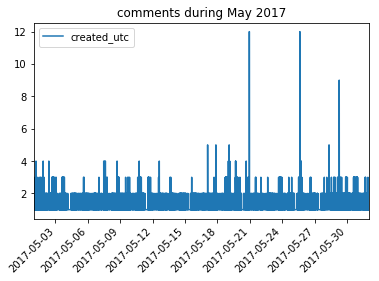

In [129]:
#now graph the number of comments during the month by time

#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

time_countsDf.plot(kind='line',title= 'comments during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Commeets')
plt.show()


In [146]:
import datetime
#count comments during the month by date
#reformat created_utc to day
tech_df['created_date']=tech_df['created_utc'].dt.day
day_counts=tech_df.created_date.value_counts().sort_index()
day_countsDf= day_counts.to_frame()
#time_countsDf.rename(columns=)
day_countsDf.rename(columns={'time':'comments'},inplace=True)
#day_countsDf.sort_values(by='index')

In [147]:
day_countsDf

,created_date
1,7112
2,6879
3,5977
4,2757
5,3602
6,2938
7,2446
8,5046
9,4673
10,5770


TypeError: 'str' object is not callable

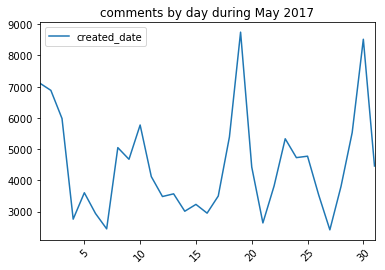

In [148]:
#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

day_countsDf.plot(kind='line',title= 'comments by day during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Comments')
plt.show()


In [42]:
#count comments by hour(1-24) of the day
hour_counts=tech_df.hour.value_counts().sort_index()
unique_hours=tech_df.hour.unique()
hour_countsDf= hour_counts.to_frame()
#unique_hoursDf= unique_hours.to_frame()
hour_countsDf.rename(columns={'hour':'comments'},inplace=True)
#print(hour_counts)
#print(unique_hours)

In [1]:
#save the datframe to disk using pickle
#tech_df.to_pickle('/home/augustine/Documents/reddit_project/subr_technology_201705.pkl')

# reimport pandas and read in pickle
import pandas as pd
#read the df if needed.
tech_df= pd.read_pickle('/home/augustine/Documents/reddit_project/subr_technology_201705.pkl')

In [144]:
hour_counts

0      5370
1      4843
2      4365
3      3501
4      3106
5      3213
6      2983
7      2540
8      2291
9      2170
10     2642
11     3464
12     5033
13     6564
14     8561
15    10063
16    10032
17    10124
18    10369
19     9884
20     8451
21     7364
22     6658
23     5545
Name: hour, dtype: int64

TypeError: 'str' object is not callable

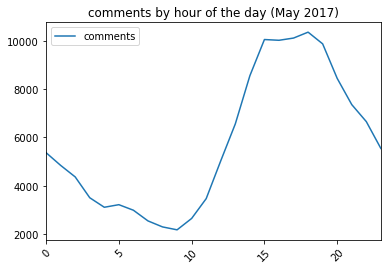

In [138]:
#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

hour_countsDf.plot(kind='line',title= 'comments by hour of the day (May 2017)')
plt.xticks(rotation=45)
plt.xlabel('hour of day')
plt.ylabel('Comments')
plt.show()


In [2]:
#split and load parts of parent id to 't_' and '_id'
tech_df['t_'],tech_df['_id']=tech_df['parent_id'].str.split("_",1).str
#find parent_id of comment parent
idParent_dict= tech_df.set_index('id')['_id'].to_dict()
tech_df['parent_1']=tech_df['_id'].map(idParent_dict)

In [87]:
#step by step walkthrough
#loop through the data frame, by parentId group,
#create dictionary to recursively match parent and child in thread
print(tech_df['id'].describe(),'\n')



print(tech_df['parent_id'].describe(),'\n')
#split and load parts of parent id to 't_' and '_id'
#tech_df['t_'],tech_df['_id']=tech_df['parent_id'].str.split("_",1).str

#idParent_dict= tech_df.set_index('id')['_id'].to_dict()

#find parent_id of comment parent
tech_df['parent_1']=tech_df['_id'].map(idParent_dict)

print(tech_df['parent_1'].describe(),'\n')

#do the same thing on parent_1
#tech_df['parent_2']=tech_df['parent_1'].map(linkParent_dict)
print(tech_df['parent_2'].describe(),'\n')

#do the same thing on parent_2
#tech_df['parent_3']=tech_df['parent_2'].map(linkParent_dict)
print(tech_df['parent_3'].describe(),'\n')
#tech_df[parent_id]
#tech_df.sort().group_by()
#def 

count      139136
unique     139136
top       di8i4n2
freq            1
Name: id, dtype: object 

count        139136
unique        68955
top       t3_6cvg82
freq            942
Name: parent_id, dtype: object 

count     108321
unique     39310
top       6bytpx
freq         776
Name: parent_1, dtype: object 

count         10062
unique         6185
top       t3_6c27c1
freq            406
Name: parent_2, dtype: object 

count         10062
unique         6185
top       t3_6c27c1
freq            406
Name: parent_3, dtype: object 



In [123]:
tech_df.reset_index()

,index,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,retrieved_on,score,stickied,subreddit,subreddit_id,hour,parent_1,parent_2,parent_3,t_,_id
0,0,TittieMilkTittieMilk,None,None,"Wait, you can get HBO for just a couple months...",True,0,2017-05-01 00:00:27,None,False,0,dgyrv10,t3_68g6e7,t1_dgym9lv,1494514478,11,False,technology,t5_2qh16,0,NaN,NaN,NaN,t1,dgym9lv
1,1,Natanael_L,None,None,And that's still a social problem. How to solv...,True,0,2017-05-01 00:01:20,None,False,0,dgyrwci,t3_68dw34,t1_dgymgut,1494514495,2,False,technology,t5_2qh16,0,NaN,NaN,NaN,t1,dgymgut
2,2,Esc_ape_artist,None,None,Get rid of net neutrality and they move the fe...,True,0,2017-05-01 00:01:26,None,False,0,dgyrwgp,t3_68g6e7,t1_dgyija1,1494514497,20,False,technology,t5_2qh16,0,NaN,NaN,NaN,t1,dgyija1
3,3,Aquareon,None,None,Objects do not typically recognize their surro...,True,0,2017-05-01 00:02:18,None,False,0,dgyrxsr,t3_68eud9,t1_dgxy7l3,1494514515,0,False,technology,t5_2qh16,0,NaN,NaN,NaN,t1,dgxy7l3
4,4,LeakySkylight,None,None,"Google makes around $1.50 per handset, and onl...",True,0,2017-05-01 00:02:22,None,False,0,dgyrxwv,t3_68eksh,t1_dgyh9nm,1494514516,1,False,technology,t5_2qh16,0,NaN,NaN,NaN,t1,dgyh9nm
5,5,republitard,None,None,&gt; At least in the uk your account is create...,True,0,2017-05-01 00:02:42,None,False,0,dgyryeo,t3_68cg8h,t1_dgxvogq,1494514523,1,False,technology,t5_2qh16,0,NaN,NaN,NaN,t1,dgxvogq
6,6,mostlyemptyspace,None,None,Does anyone here use a service like sling in p...,True,0,2017-05-01 00:02:45,None,False,0,dgyrygs,t3_68g6e7,t3_68g6e7,1494514524,1,False,technology,t5_2qh16,0,NaN,NaN,NaN,t3,68g6e7
7,7,dnew,None,None,The fact that Wii U people ported YouTube done...,True,0,2017-05-01 00:03:12,None,False,0,dgyrz3d,t3_68eksh,t1_dgyrmnt,1494514533,1,False,technology,t5_2qh16,0,NaN,NaN,NaN,t1,dgyrmnt
8,8,mineralwatersoda,None,None,MS has services and software to offer. Ubuntu ...,True,0,2017-05-01 00:03:57,None,False,0,dgys096,t3_68eksh,t1_dgyrxwv,1494514548,2,False,technology,t5_2qh16,0,dgyh9nm,NaN,NaN,t1,dgyrxwv
9,9,DavidB7,None,None,"Sucks, I still use one daily though alongside ...",True,0,2017-05-01 00:05:08,None,False,0,dgys1yz,t3_68eksh,t3_68eksh,1494514571,2,False,technology,t5_2qh16,0,NaN,NaN,NaN,t3,68eksh


In [3]:
techT1_df=tech_df.drop(tech_df[(tech_df.t_)!='t1'].index)
                                

In [7]:
techT1_df

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,parent_id,retrieved_on,score,stickied,subreddit,subreddit_id,hour,t_,_id,parent_1
0,TittieMilkTittieMilk,None,None,"Wait, you can get HBO for just a couple months...",True,0,2017-05-01 00:00:27,None,False,0,...,t1_dgym9lv,1494514478,11,False,technology,t5_2qh16,0,t1,dgym9lv,NaN
1,Natanael_L,None,None,And that's still a social problem. How to solv...,True,0,2017-05-01 00:01:20,None,False,0,...,t1_dgymgut,1494514495,2,False,technology,t5_2qh16,0,t1,dgymgut,NaN
2,Esc_ape_artist,None,None,Get rid of net neutrality and they move the fe...,True,0,2017-05-01 00:01:26,None,False,0,...,t1_dgyija1,1494514497,20,False,technology,t5_2qh16,0,t1,dgyija1,NaN
3,Aquareon,None,None,Objects do not typically recognize their surro...,True,0,2017-05-01 00:02:18,None,False,0,...,t1_dgxy7l3,1494514515,0,False,technology,t5_2qh16,0,t1,dgxy7l3,NaN
4,LeakySkylight,None,None,"Google makes around $1.50 per handset, and onl...",True,0,2017-05-01 00:02:22,None,False,0,...,t1_dgyh9nm,1494514516,1,False,technology,t5_2qh16,0,t1,dgyh9nm,NaN
5,republitard,None,None,&gt; At least in the uk your account is create...,True,0,2017-05-01 00:02:42,None,False,0,...,t1_dgxvogq,1494514523,1,False,technology,t5_2qh16,0,t1,dgxvogq,NaN
7,dnew,None,None,The fact that Wii U people ported YouTube done...,True,0,2017-05-01 00:03:12,None,False,0,...,t1_dgyrmnt,1494514533,1,False,technology,t5_2qh16,0,t1,dgyrmnt,NaN
8,mineralwatersoda,None,None,MS has services and software to offer. Ubuntu ...,True,0,2017-05-01 00:03:57,None,False,0,...,t1_dgyrxwv,1494514548,2,False,technology,t5_2qh16,0,t1,dgyrxwv,dgyh9nm
10,DiggingNoMore,None,None,&gt; Where do you get your internet?\n\nGoogle...,True,0,2017-05-01 00:05:14,None,False,0,...,t1_dgyl56p,1494514573,-6,False,technology,t5_2qh16,0,t1,dgyl56p,NaN
11,Natanael_L,None,None,Thunderbird + enigmail is shaking its head at ...,True,0,2017-05-01 00:05:16,None,False,0,...,t1_dgy6i40,1494514573,8,False,technology,t5_2qh16,0,t1,dgy6i40,NaN


In [4]:
#remove obeservations where the body/comment was deleted
techT1Del_df= techT1_df.loc[(techT1_df['body']!='[deleted]')]
#techT1Del_df.reset_index(inplace=True)
#techT1Del_df.set_index('index',inplace=True)

In [8]:
techT1Del_df

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,parent_id,retrieved_on,score,stickied,subreddit,subreddit_id,hour,t_,_id,parent_1
0,TittieMilkTittieMilk,None,None,"Wait, you can get HBO for just a couple months...",True,0,2017-05-01 00:00:27,None,False,0,...,t1_dgym9lv,1494514478,11,False,technology,t5_2qh16,0,t1,dgym9lv,NaN
1,Natanael_L,None,None,And that's still a social problem. How to solv...,True,0,2017-05-01 00:01:20,None,False,0,...,t1_dgymgut,1494514495,2,False,technology,t5_2qh16,0,t1,dgymgut,NaN
2,Esc_ape_artist,None,None,Get rid of net neutrality and they move the fe...,True,0,2017-05-01 00:01:26,None,False,0,...,t1_dgyija1,1494514497,20,False,technology,t5_2qh16,0,t1,dgyija1,NaN
3,Aquareon,None,None,Objects do not typically recognize their surro...,True,0,2017-05-01 00:02:18,None,False,0,...,t1_dgxy7l3,1494514515,0,False,technology,t5_2qh16,0,t1,dgxy7l3,NaN
4,LeakySkylight,None,None,"Google makes around $1.50 per handset, and onl...",True,0,2017-05-01 00:02:22,None,False,0,...,t1_dgyh9nm,1494514516,1,False,technology,t5_2qh16,0,t1,dgyh9nm,NaN
5,republitard,None,None,&gt; At least in the uk your account is create...,True,0,2017-05-01 00:02:42,None,False,0,...,t1_dgxvogq,1494514523,1,False,technology,t5_2qh16,0,t1,dgxvogq,NaN
7,dnew,None,None,The fact that Wii U people ported YouTube done...,True,0,2017-05-01 00:03:12,None,False,0,...,t1_dgyrmnt,1494514533,1,False,technology,t5_2qh16,0,t1,dgyrmnt,NaN
8,mineralwatersoda,None,None,MS has services and software to offer. Ubuntu ...,True,0,2017-05-01 00:03:57,None,False,0,...,t1_dgyrxwv,1494514548,2,False,technology,t5_2qh16,0,t1,dgyrxwv,dgyh9nm
10,DiggingNoMore,None,None,&gt; Where do you get your internet?\n\nGoogle...,True,0,2017-05-01 00:05:14,None,False,0,...,t1_dgyl56p,1494514573,-6,False,technology,t5_2qh16,0,t1,dgyl56p,NaN
11,Natanael_L,None,None,Thunderbird + enigmail is shaking its head at ...,True,0,2017-05-01 00:05:16,None,False,0,...,t1_dgy6i40,1494514573,8,False,technology,t5_2qh16,0,t1,dgy6i40,NaN


In [103]:
techT1_df['parent_id'].describe()

count         108980
unique         61687
top       t1_dh13wun
freq             331
Name: parent_id, dtype: object

In [99]:
techT1_df['score'].describe()

count    108980.000000
mean         10.624803
std          83.397094
min        -501.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        7569.000000
Name: score, dtype: float64

In [150]:
#testing lemmatizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
print(wordnet_lemmatizer.lemmatize('dogs'))
print(wordnet_lemmatizer.lemmatize('dogs in churches'))

dog
dogs in churches


In [180]:
techT1Del_df['score'].describe()


count    104403.000000
mean         10.937732
std          84.926406
min        -501.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        7569.000000
Name: score, dtype: float64

In [5]:
import numpy as np
#create class labels for negative(1), neutral(2), positive(3) 

techT1Del_df['target']= np.where(techT1Del_df['score']< techT1Del_df['score'].mean()-techT1Del_df['score'].std(),1,
    np.where((techT1Del_df['score']>= techT1Del_df['score'].mean()-techT1Del_df['score'].std()) & 
             (techT1Del_df['score']<= techT1Del_df['score'].mean() + techT1Del_df['score'].std()),2,
        np.where(techT1Del_df['score']> techT1Del_df['score'].mean() + techT1Del_df['score'].std(),3,4)))


/home/augustine/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
#split data set into train and test 
from sklearn.model_selection import train_test_split 

#split dataStg into train/ test
train, test= train_test_split(techT1Del_df,test_size=.2)

# recreate index in test and train sets so we can run through the text processing function
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


In [7]:
#clean text
#define function to process raw text one record at a time
from bs4 import BeautifulSoup
import re 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.stem import PorterStemmer 
ps= PorterStemmer()
from nltk.corpus import stopwords 
from nltk import clean_html

def processText(raw):
#remove tags
#    text= clean_html(raw)
    text = BeautifulSoup(raw,'lxml')

#remove numbers so we only have text    
    letters= re.sub("[^a-zA-Z]"," ",text.get_text())
#remove url patterns    
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    letters = re.sub(url_pattern, ' ', letters)
#change everything to lower case and split 
    lowerCase= letters.lower()
#stem lower case letters
    stems= ps.stem(lowerCase).split()
#remove common words using nltk dictionary
    stopWords= set(stopwords.words('english'))
    procdText= [j for j in stems if not j in stopWords]
#mash everything back together     
    return( " ".join(procdText))

In [8]:
#loop through train data and process text
#get number of rows
numRows= train["body"].size
print(numRows)
#init empty list
cleanText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    cleanText.append(processText(train["body"][i]))


83522


/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://i0.kym-cdn.com/photos/images/newsfeed/000/039/931/600px-Gentlemen.jpg
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://imgur.com/yMVeOqf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://phys.org/news/2016-04-drones-dangerous-airplanes.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use a

processing 50000 of 83522



/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://i.imgur.com/qOf4NpQ.png" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://truth-out.org/buzzflash/commentary/undocumented-immigrants-pay-billions-in-taxes-and-social-security" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://static.srcdn.com/wp-content/uploads/Jeffrey-Dean-Morgan-as-Negan-in-The-Walking-Dead-Season-6-Episode

In [21]:
cleanText[1000]

'mention ubi would woefully inadequate get people go spend spend spend bad need ubi guarantee money would used food basic necessities lot would hoovered taxes fees surcharges etc dystopian fantasy pedaled futurists suffering trump derangement syndrome'

In [9]:
#Do the same processing loop through text for the test data
numRows= test["body"].size
print(numRows)
#init empty list
testText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    testText.append(processText(test["body"][i]))

20881


/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://priceonomics.com/the-reading-level-of-the-state-of-union-address-is/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://www.youtube.com/watch?v=exnaY0l4XsM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/augustine/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://www.privateinternetaccess.com/blog/2017/03/today-senators-will-vote-allow-isps-sell-internet-history-end-fcc-online-pr

In [10]:
#create arrays that just contain the target variables
#these arrays are used in chi2 test
yTrain, yTest = train.target, test.target

In [11]:
#Create count vector and normalize
#TF*IDF transformation in one step
from sklearn.feature_extraction.text import TfidfVectorizer

transformer= TfidfVectorizer(ngram_range=(1,1))

tfidf= transformer.fit_transform(cleanText)#x_train_counts)
tfidf.shape

#now extract same features from test set
x_test = transformer.transform(testText)

#save feature names
featureNames= transformer.get_feature_names()

In [12]:
#Chi-Squared selection on text features before stacking and scaling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ch2= SelectKBest(chi2,k=1000)

x_train = ch2.fit_transform(tfidf, yTrain)
x_train.shape


x_test_new = ch2.transform(x_test)

if featureNames:
    #update with selected feature names
    featureNames= np.asarray(transformer.get_feature_names())[ch2.get_support()]

    #featureNames = [featureNames[i] for i in ch2.get_support(indices=False)]
print(x_train.shape)
len(featureNames)

(83522, 1000)


1000

In [15]:
#scale features to prepare for classifier
#scale features to prepare for classifier

from sklearn import preprocessing

tfidfScaled= preprocessing.scale(x_train, with_mean=False)
testScaled= preprocessing.scale(x_test_new, with_mean=False)
#foo=preprocessing.scale(testFt, with_mean=False)

In [17]:
#create new data frame for ML algorithms
x_train= tfidfScaled
x_test_new= testScaled

In [19]:

#import libraries
from time import time
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#define function to run through different classifiers


def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf_type)
    if clf_type=='SVM':
        cv= StratifiedKFold(n_splits= 2)
    else:
        cv= StratifiedKFold(n_splits= 5)
    t0 = time()
    if clf_type=='SVM':
        clf.fit(x_train,yTrain)
        #print("roc_auc score: ", str(scores))
    else:
        scores= cross_val_score(clf, x_train, yTrain,cv= cv, scoring='roc_auc')
        clf.fit(x_train, yTrain)
        print("stratified 5-fold cross validation roc_auc score: ", str(scores))
    
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    #pred= cross_val_predict(clf, x_train, yTrain,cv=cv)
    pred = clf.predict(x_test_new)
    if clf_type== 'SVM':
        preds= clf.decision_function(x_test_new)
    else:
        preds = clf.predict_proba(x_test_new)[:,1]
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(yTest, pred)
    print("accuracy:   %0.3f" % score)
    
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if featureNames is not None and clf_type is not 'SVM':
            print("top keywords:")
            top10 = np.argsort(clf.coef_[0])[-10:]
            coefs_with_fns = sorted(zip(clf.coef_[0], featureNames))
            top = zip(coefs_with_fns[:19], coefs_with_fns[:-(10 + 1):-1])
            for (coef_1, fn_1), (coef_2, fn_2) in top:
                print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
            #print("%s: %s" % (" ".join(featureNames[top10])))
                print()
        
        #def show_most_informative_features(vectorizer, clf, n=20):
            #feature_names = vectorizer.get_feature_names()
            #coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
            #top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
            #for (coef_1, fn_1), (coef_2, fn_2) in top:
                #print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
        print("classification report:")
        print(metrics.classification_report(yTest, pred))#,target_names=target_names))
        print("confusion matrix:")
        print(metrics.confusion_matrix(yTest, pred))

        
        # Compute ROC curve and ROC area for each class
        #fpr = dict()
        #tpr = dict()
        #roc_auc = dict()
        fpr, tpr, _ = metrics.roc_curve(yTest, preds)
        roc_auc = auc(fpr, tpr)

        # Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(yTest.ravel(), preds.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time




In [ ]:
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


#model_to_set = OneVsRestClassifier(SVC(kernel="poly"))
model_to_set = OneVsRestClassifier(SVC(kernel='linear'))
parameters = {"estimator__C": [10**(-2),10**(-1),10**(0),10**(1),10**(2)]}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters)#, scoring=f1_score)

model_tunning.fit(x_train,yTrain)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

In [37]:
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


#model_to_set = OneVsRestClassifier(SVC(kernel="poly"))
model_to_set = OneVsRestClassifier(LogisticRegression(multi_class='ovr',solver='sag',penalty='l2',class_weight='balanced'))
parameters = {"estimator__C": [.01,.1,1,10]}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters)#, scoring=f1_score)

model_tunning.fit(x_train,yTrain)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

/home/augustine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/augustine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/augustine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/augustine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/augustine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: T

0.8713752065324106
{'estimator__C': 1}


/home/augustine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [27]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

logReg= LogisticRegression(multi_class='ovr',solver='saga',penalty='l2',class_weight='balanced')
#penalty='l1',class_weight='balanced')
#parameters= {'C':[.01,.1,1,10]}
fit_params= {'C':[.1,1]}
clf= GridSearchCV(logReg,fit_params,cv=2)
score= clf.fit(x_train,yTrain)
print('Best C Parameter: ', clf.best_params_)

print (roc_auc_score(clf.predict(x_test_new),yTest))

ValueError: Logistic Regression supports only liblinear, newton-cg, lbfgs and sag solvers, got saga

In [ ]:
#tri-gram 5k features
#load results in empty array
results=[]

clf_type='LogReg'              
print(clf_type)               
results.append(benchmark(linear_model.LogisticRegression(C=1, penalty='l1',class_weight='balanced')))

In [13]:

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    comment= [json.loads(comment)['body'] for comment in f if json.loads(comment)['subreddit']=='technology']
    for text in comment:
        print(text)
        break
 #       print(comment)
 #       break
 #       body= comment['body']
 #       my_id= comment['id']
 #       created_utc= comment['created_utc']
 #       parent_id=comment['parent_id']
 #       score= comment['score']
        
    
#    for text in myTech:
#        print(text)
    



KeyboardInterrupt: 

In [ ]:

archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    comment= [json.loads(comment)['body'] for comment in f if json.loads(comment)['subreddit']=='technology']
    for text in comment:
        print(text)
        break
 